In [98]:
import pandas as pd

In [99]:
df=pd.read_csv(r"C:\Users\Dell\Downloads\archive\application_record.csv")
record = pd.read_csv(r"C:\Users\Dell\Downloads\archive/credit_record.csv", encoding = 'utf-8')

In [100]:
begin_month=pd.DataFrame(record.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
begin_month=begin_month.rename(columns={'MONTHS_BALANCE':'begin_month'}) 

In [101]:
record.loc[record['STATUS']=='X', 'STATUS']=-1 
record.loc[record['STATUS']=='C', 'STATUS']=-1 
record.loc[record['STATUS']=='0', 'STATUS']=0 
record.loc[record['STATUS']=='1', 'STATUS']=1
record.loc[record['STATUS']=='2', 'STATUS']=2
record.loc[record['STATUS']=='3', 'STATUS']=3 
record.loc[record['STATUS']=='4', 'STATUS']=4 
record.loc[record['STATUS']=='5', 'STATUS']=5


In [102]:
record.loc[record['STATUS']>=2, 'dep_value']=1
record.loc[record['STATUS']<2, 'dep_value']=0
temp = record[['ID', 'dep_value']].groupby('ID').sum()
temp.loc[temp['dep_value']!=0, 'dep_value']='Yes'
temp.loc[temp['dep_value']==0, 'dep_value']= 'No'
temp.value_counts(normalize=True)

dep_value
No           0.985495
Yes          0.014505
dtype: float64

In [103]:
new_data=pd.merge(df,begin_month,how="left",on="ID")
new_data=pd.merge(new_data, temp,how='inner',on='ID')
new_data['target']=new_data['dep_value']
new_data.loc[new_data['target']=='Yes','target']=1
new_data.loc[new_data['target']=='No','target']=0





In [104]:


new_data['OCCUPATION_TYPE'].fillna(value='Not identified', inplace=True)

In [105]:
new_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,dep_value,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,Not identified,2.0,-15.0,No,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,Not identified,2.0,-14.0,No,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0


In [106]:
df['OCCUPATION_TYPE'].fillna(value='Not identified', inplace=True)

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [108]:
cov_data = np.array([df.loc[:,'AMT_INCOME_TOTAL'],df.loc[:,'DAYS_BIRTH'],
                     df.loc[:,'CNT_CHILDREN'],   df.loc[:,'CNT_FAM_MEMBERS'],df.loc[:,'FLAG_EMAIL'],
                  df.loc[:,'DAYS_EMPLOYED'],df.loc[:,'FLAG_MOBIL']
                 ])

In [109]:
covMatrix = np.cov(cov_data,bias=True)
print (covMatrix)

new_data.dtypes

[[ 1.21190876e+10  2.47747898e+07  1.53030895e+03  1.13135122e+03
   3.83488974e+03 -2.15843595e+09  0.00000000e+00]
 [ 2.47747898e+07  1.75144362e+07  1.05901045e+03  1.14965122e+03
   1.25781949e+02 -3.58847576e+08  0.00000000e+00]
 [ 1.53030895e+03  1.05901045e+03  5.25453025e-01  5.75433632e-01
   6.40781964e-03 -2.42960666e+04  0.00000000e+00]
 [ 1.13135122e+03  1.14965122e+03  5.75433632e-01  8.04979158e-01
   6.14666285e-03 -2.91801344e+04  0.00000000e+00]
 [ 3.83488974e+03  1.25781949e+02  6.40781964e-03  6.14666285e-03
   9.64983572e-02 -3.20596932e+03  0.00000000e+00]
 [-2.15843595e+09 -3.58847576e+08 -2.42960666e+04 -2.91801344e+04
  -3.20596932e+03  1.92564583e+10  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]


ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
begin_month            float64
dep_value               object
target                  object
dtype: object

In [110]:
new_data['AGE'] = np.ceil(pd.to_timedelta(new_data['DAYS_BIRTH'], unit='D').dt.days / -365.25)
new_data['AGE']


0        33.0
1        33.0
2        59.0
3        53.0
4        53.0
         ... 
36452    48.0
36453    34.0
36454    34.0
36455    50.0
36456    26.0
Name: AGE, Length: 36457, dtype: float64

In [111]:
new_data.drop(['DAYS_BIRTH'], axis=1, inplace=True)
new_data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
begin_month            0
dep_value              0
target                 0
AGE                    0
dtype: int64

In [112]:
new_data.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
begin_month            float64
dep_value               object
target                  object
AGE                    float64
dtype: object

In [113]:
# Adjusting days employed, as the people who had the wrong value (pensioners), did not work at all
new_data.loc[(new_data['DAYS_EMPLOYED'] > 0), 'DAYS_EMPLOYED'] = 0

new_data['YEARS_EMPLOYED'] = np.ceil(pd.to_timedelta(new_data['DAYS_EMPLOYED'], unit='D').dt.days / -365.25)

In [114]:
new_data['YEARS_EMPLOYED']

0        13.0
1        13.0
2         4.0
3         9.0
4         9.0
         ... 
36452     7.0
36453     4.0
36454     4.0
36455     2.0
36456     4.0
Name: YEARS_EMPLOYED, Length: 36457, dtype: float64

In [115]:
new_data.drop(['YEARS_EMPLOYED'], axis=1, inplace=True)

In [116]:
new_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,dep_value,target,AGE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Not identified,2.0,-15.0,No,0,33.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Not identified,2.0,-14.0,No,0,33.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,-29.0,No,0,59.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,-4.0,No,0,53.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,-26.0,No,0,53.0


In [117]:
def value_cnt_norm_cal(df,feature):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

In [118]:
def create_bar_plot(df,feature):
    if feature == 'Marital status' or 'Dwelling' or 'Job title' or 'Employment status' or 'Education level':
        fig, ax = plt.subplots(figsize=(6,10))
        sns.barplot(x=value_cnt_norm_cal(df,feature).index,y=value_cnt_norm_cal(df,feature).values[:,0])
        ax.set_xticklabels(labels=value_cnt_norm_cal(df,feature).index,rotation=45,ha='right')
        plt.xlabel('{}'.format(feature))
        plt.ylabel('Count')
        plt.title('{} count'.format(feature))
        return plt.show()
    else :
        fig, ax = plt.subplots(figsize=(6,10))
        sns.barplot(x=value_cnt_norm_cal(df,feature).index,y=value_cnt_norm_cal(df,feature).values[:,0])
        plt.xlabel('{}'.format(feature))
        plt.ylabel('Count')
        plt.title('{} count'.format(feature))
        return plt.show()

In [119]:
def gen_info_feat(df,feature):
    if feature == 'Age':
        # change the feature to be express in positive numbers days
        print('Description:\n{}'.format((np.abs(df[feature])/365.25).describe()))
        print('*'*50)
        print('Object type:{}'.format(df[feature].dtype))
    elif feature == 'Employment length':
        # select only the rows where the rows are negative to ignore whose who have retired or unemployed
        employment_len_no_ret = cc_train_copy['Employment length'][cc_train_copy['Employment length'] < 0]
        employment_len_no_ret_yrs = np.abs(employment_len_no_ret)/365.25
        print('Description:\n{}'.format((employment_len_no_ret_yrs).describe()))
        print('*'*50)
        print('Object type:{}'.format(employment_len_no_ret.dtype))
    elif feature ==  'Account age':
        # change the account age to a positive number of months
        print('Description:\n{}'.format((np.abs(df[feature])).describe()))
        print('*'*50)
        print('Object type:{}'.format(df[feature].dtype))
    else:
        print('Description:\n{}'.format(df[feature].describe()))
        print('*'*50)
        print('Object type:\n{}'.format(df[feature].dtype))
        print('*'*50)
        value_cnt = value_cnt_norm_cal(df,feature)
        print('Value count:\n{}'.format(value_cnt))


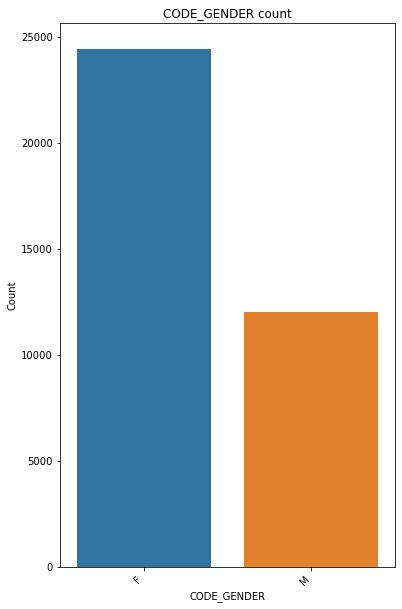

In [120]:
create_bar_plot(new_data,'CODE_GENDER')

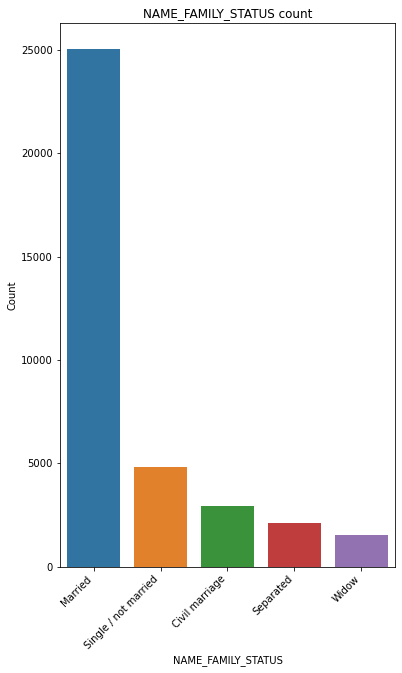

In [121]:
create_bar_plot(new_data,'NAME_FAMILY_STATUS')

In [122]:
gen_info_feat(new_data,'NAME_FAMILY_STATUS')

Description:
count       36457
unique          5
top       Married
freq        25048
Name: NAME_FAMILY_STATUS, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                      Count  Frequency (%)
Married               25048      68.705598
Single / not married   4829      13.245742
Civil marriage         2945       8.078010
Separated              2103       5.768440
Widow                  1532       4.202211


In [123]:
# High risk vs low risk applicants compared on a box plot
import matplotlib
import matplotlib.pyplot as plt

def low_high_risk_box_plot(df,feature):
    if feature == 'AGE':
        print(np.abs(df.groupby('target')[feature].mean()/365.25))
        fig, ax = plt.subplots(figsize=(5,8))
        sns.boxplot(y=np.abs(df[feature])/365.25,x=df['target'])
        plt.xticks(ticks=[0,1],labels=['no','yes'])
        plt.title('High risk individuals grouped by age')
        return plt.show()
    elif feature == 'AMT_INCOME_TOTAL':
        print(np.abs(df.groupby('target')[feature].mean()))
        fig, ax = plt.subplots(figsize=(5,8))
        sns.boxplot(y=np.abs(df[feature]),x=df['target'])
        plt.xticks(ticks=[0,1],labels=['no','yes'])
        # suppress scientific notation
        ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        plt.title('High risk individuals grouped by {}'.format(feature))
        return plt.show()

In [124]:
new_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,dep_value,target,AGE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Not identified,2.0,-15.0,No,0,33.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Not identified,2.0,-14.0,No,0,33.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,-29.0,No,0,59.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,-4.0,No,0,53.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,-26.0,No,0,53.0


target
0    186699.846740
1    185864.763799
Name: AMT_INCOME_TOTAL, dtype: float64


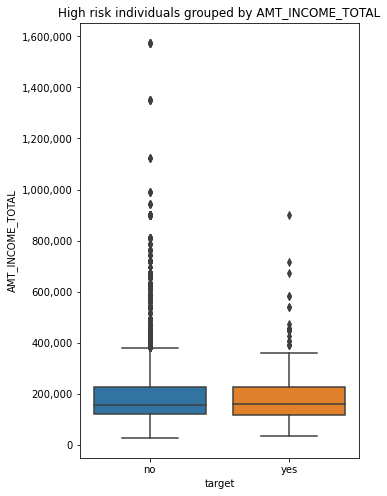

In [125]:
low_high_risk_box_plot(new_data,'AMT_INCOME_TOTAL')

In [126]:
# High risk vs low risk applicants compared on a bar plot
def low_high_risk_bar_plot(df,feature):
    is_high_risk_grp = df.groupby(feature)['target'].sum()
    is_high_risk_grp_srt = is_high_risk_grp.sort_values(ascending=False)
    print(dict(is_high_risk_grp_srt))
    fig, ax = plt.subplots(figsize=(6,10))
    sns.barplot(x=is_high_risk_grp_srt.index,y=is_high_risk_grp_srt.values)
    ax.set_xticklabels(labels=is_high_risk_grp_srt.index,rotation=45, ha='right')
    plt.ylabel('Count')
    plt.title('High risk applicants count grouped by {}'.format(feature))
    return plt.show()

target
0    186699.846740
1    185864.763799
Name: AMT_INCOME_TOTAL, dtype: float64


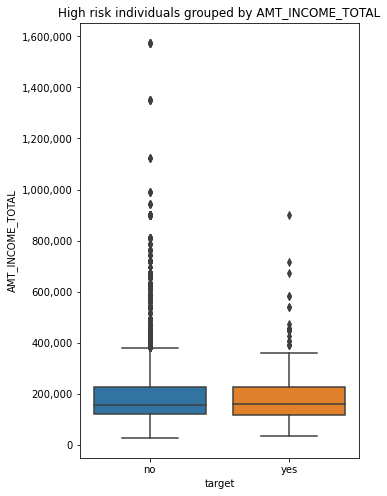

In [127]:
low_high_risk_box_plot(new_data,'AMT_INCOME_TOTAL')

{'Married': 393, 'Single / not married': 101, 'Civil marriage': 46, 'Widow': 45, 'Separated': 31}


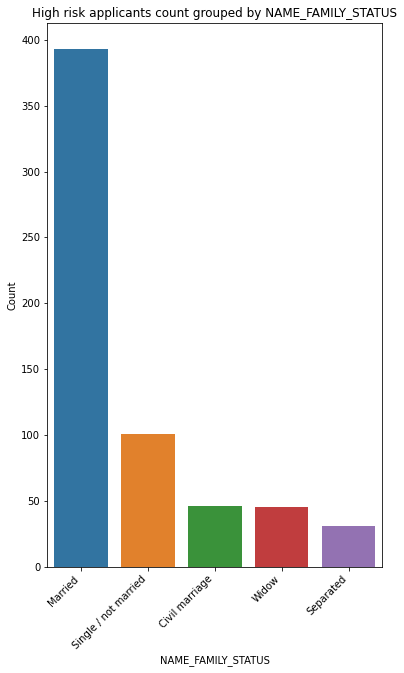

In [128]:
low_high_risk_bar_plot(new_data,'NAME_FAMILY_STATUS')

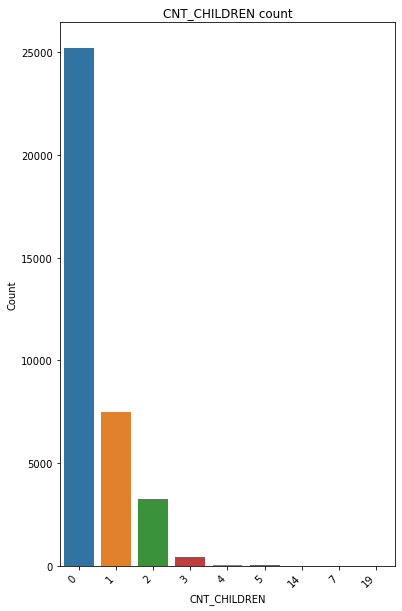

In [129]:
create_bar_plot(new_data,'CNT_CHILDREN')

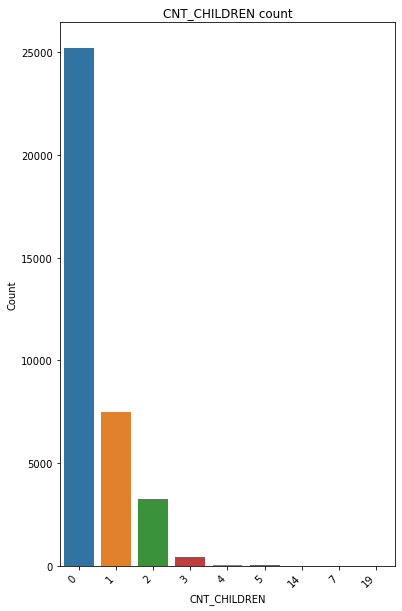

In [130]:
create_bar_plot(new_data,'CNT_CHILDREN')

In [131]:
new_data['CODE_GENDER'].replace('M',0,inplace=True)
new_data['CODE_GENDER'].replace('F',1,inplace=True)
new_data['FLAG_OWN_CAR'].replace('Y',0,inplace=True)
new_data['FLAG_OWN_CAR'].replace('N',1,inplace=True)
new_data['FLAG_OWN_REALTY'].replace('Y',0,inplace=True)
new_data['FLAG_OWN_REALTY'].replace('N',1,inplace=True)

In [132]:
new_data['NAME_INCOME_TYPE'] = new_data['NAME_INCOME_TYPE'].astype('category')
new_data['NAME_EDUCATION_TYPE'] = new_data['NAME_EDUCATION_TYPE'].astype('category')
new_data['NAME_FAMILY_STATUS'] = new_data['NAME_FAMILY_STATUS'].astype('category')
new_data['NAME_HOUSING_TYPE'] = new_data['NAME_HOUSING_TYPE'].astype('category')
new_data['OCCUPATION_TYPE'] = new_data['OCCUPATION_TYPE'].astype('category')

In [133]:
new_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,dep_value,target,AGE
0,5008804,0,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Not identified,2.0,-15.0,No,0,33.0
1,5008805,0,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Not identified,2.0,-14.0,No,0,33.0
2,5008806,0,0,0,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,-29.0,No,0,59.0
3,5008808,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,-4.0,No,0,53.0
4,5008809,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,-26.0,No,0,53.0


In [134]:
new_data.drop(['begin_month','dep_value'], axis=1, inplace=True)
new_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,AGE
0,5008804,0,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,Not identified,2.0,0,33.0
1,5008805,0,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,Not identified,2.0,0,33.0
2,5008806,0,0,0,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,1,0,0,0,Security staff,2.0,0,59.0
3,5008808,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1.0,0,53.0
4,5008809,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1.0,0,53.0


In [135]:
def Cat_to_Num(features):
    for feature in features:
        feature_list = list(np.unique(new_data[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
                       feature_dict[feature_list[i]] = i
        new_data.replace({feature : feature_dict}, inplace=True)
        print(feature, '-->', feature_dict)
        
categorical_features = [ 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE']
Cat_to_Num(categorical_features)

NAME_INCOME_TYPE --> {'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3, 'Working': 4}
NAME_FAMILY_STATUS --> {'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Widow': 4}
OCCUPATION_TYPE --> {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Not identified': 12, 'Private service staff': 13, 'Realty agents': 14, 'Sales staff': 15, 'Secretaries': 16, 'Security staff': 17, 'Waiters/barmen staff': 18}
NAME_HOUSING_TYPE --> {'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}
NAME_EDUCATION_TYPE --> {'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Secondary / secondary special': 4}


In [136]:
corr = new_data.corr()
print(corr)


                           ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
ID                   1.000000    -0.012022      0.011163         0.098851   
CODE_GENDER         -0.012022     1.000000      0.361379        -0.050758   
FLAG_OWN_CAR         0.011163     0.361379      1.000000        -0.015185   
FLAG_OWN_REALTY      0.098851    -0.050758     -0.015185         1.000000   
CNT_CHILDREN         0.028878    -0.077690     -0.105839         0.000575   
AMT_INCOME_TOTAL    -0.017667    -0.197805     -0.215506        -0.032719   
NAME_INCOME_TYPE     0.023193    -0.105639     -0.054817         0.046543   
NAME_EDUCATION_TYPE -0.009211    -0.005880      0.101272        -0.010997   
NAME_FAMILY_STATUS  -0.004336     0.099289      0.121716        -0.022993   
NAME_HOUSING_TYPE    0.020613    -0.070301     -0.016337         0.179187   
DAYS_EMPLOYED        0.005745    -0.031731      0.006244        -0.033646   
FLAG_MOBIL                NaN          NaN           NaN              NaN   

<AxesSubplot:>

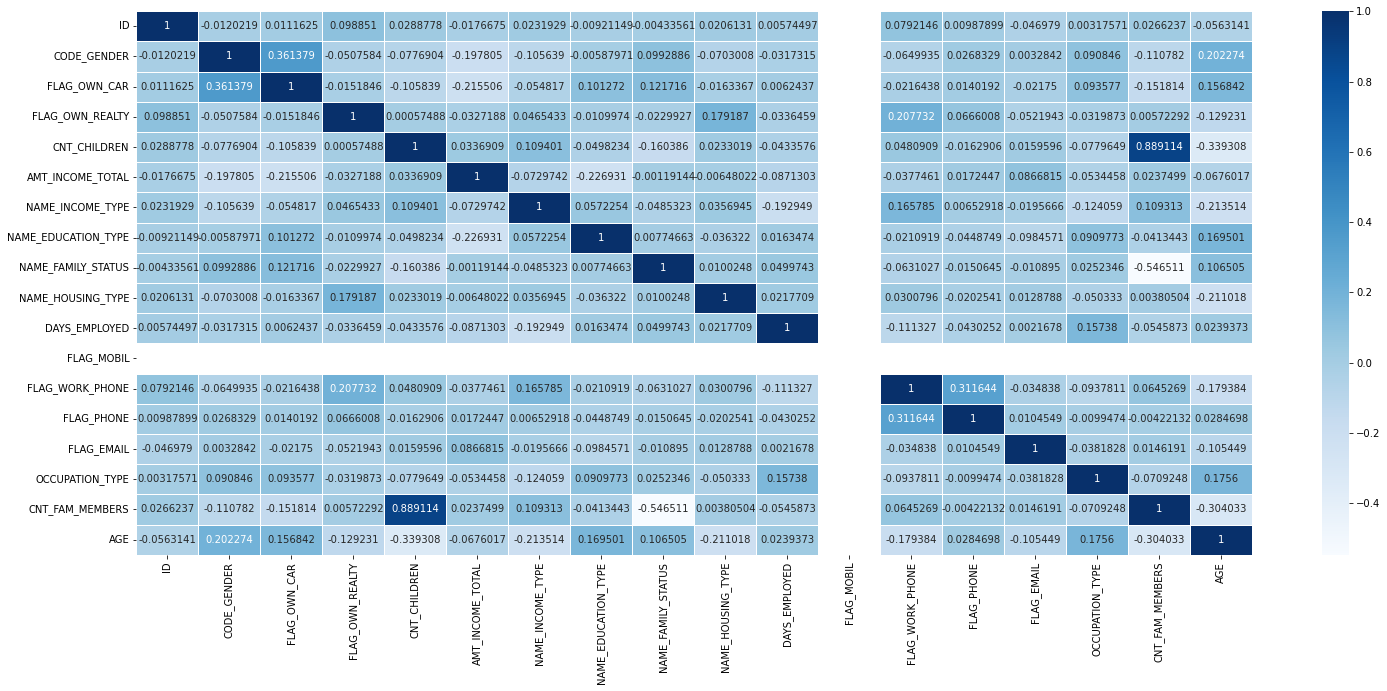

In [137]:
#Some features have skewed distribution so we will normalize the features in the next steps

plt.figure(figsize = (25,10))
sns.heatmap(corr, cmap="Blues", annot=True,linewidths=.5,fmt='g')

In [138]:
#Based on Corr Heatmap

# We will remove children (beacase high correlation with total_family)

# We will remove Mobile_phone

new_data.drop(['CNT_CHILDREN','FLAG_MOBIL'],axis=1,inplace=True)

<AxesSubplot:>

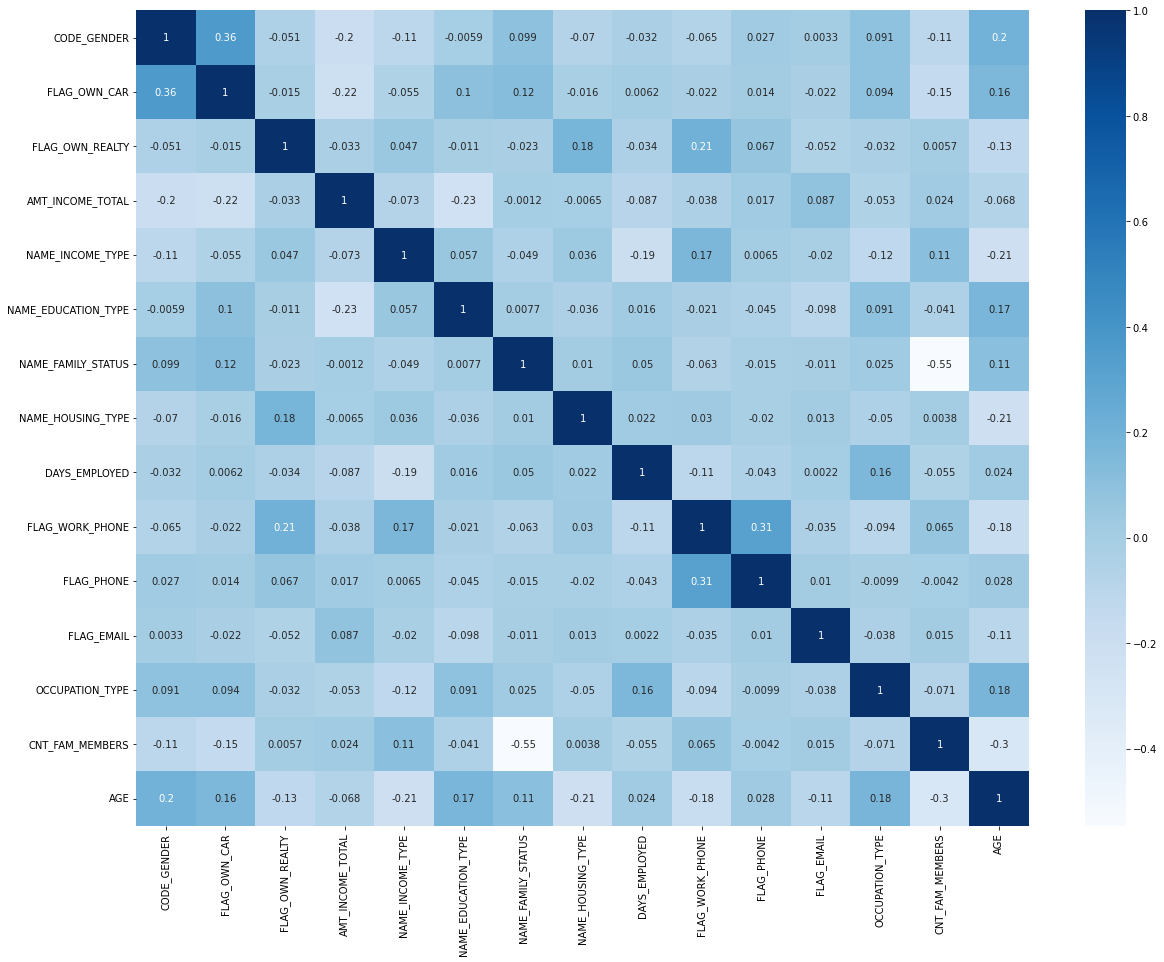

In [139]:
corr = new_data.drop('ID',axis=1).corr()
plt.figure(figsize = (20,15))
sns.heatmap(corr, cmap="Blues", annot=True)

In [140]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,36457.0,5.078227e+06,41875.240788,5008804.0,5042028.0,5074614.0,5115396.0,5150487.0
CODE_GENDER,36457.0,6.701045e-01,0.470181,0.0,0.0,1.0,1.0,1.0
FLAG_OWN_CAR,36457.0,6.202924e-01,0.485321,0.0,0.0,1.0,1.0,1.0
FLAG_OWN_REALTY,36457.0,3.278108e-01,0.469422,0.0,0.0,0.0,1.0,1.0
AMT_INCOME_TOTAL,36457.0,1.866857e+05,101789.226482,27000.0,121500.0,157500.0,225000.0,1575000.0
NAME_INCOME_TYPE,36457.0,2.398195e+00,1.734032,0.0,1.0,4.0,4.0,4.0
NAME_EDUCATION_TYPE,36457.0,3.097183e+00,1.341292,0.0,1.0,4.0,4.0,4.0
NAME_FAMILY_STATUS,36457.0,1.367885e+00,0.954557,0.0,1.0,1.0,1.0,4.0
NAME_HOUSING_TYPE,36457.0,1.282881e+00,0.951675,0.0,1.0,1.0,1.0,5.0
DAYS_EMPLOYED,36457.0,-2.200317e+03,2366.796762,-15713.0,-3153.0,-1552.0,-408.0,0.0


In [141]:
def low_high_risk_box_plot(df,feature):
    if feature == 'Age':
        print(np.abs(df.groupby('Is high risk')[feature].mean()/365.25))
        fig, ax = plt.subplots(figsize=(5,8))
        sns.boxplot(y=np.abs(df[feature])/365.25,x=df['Is high risk'])
        plt.xticks(ticks=[0,1],labels=['no','yes'])
        plt.title('High risk individuals grouped by age')
        return plt.show()


In [142]:
low_high_risk_box_plot(new_data,'AGE')

In [145]:
from sklearn.model_selection import train_test_split
X = new_data.drop(['ID','target'],axis = 1)
y = new_data['target']
y=y.astype('int')
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
model = RandomForestClassifier(random_state = 0)
model.fit(X_train, y_train)
y_predict = model.predict(X_val)
print("Accuracy = " , accuracy_score(y_val, y_predict))
print("F1 = " , f1_score(y_val, y_predict))

Accuracy =  0.9791552386176632
F1 =  0.18279569892473116


In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Training split input-  (29165, 15)
Testing split input-  (7292, 15)
Decision Tree Classifier Created
Classification report - 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7175
           1       0.30      0.17      0.22       117

    accuracy                           0.98      7292
   macro avg       0.64      0.58      0.60      7292
weighted avg       0.98      0.98      0.98      7292



Text(0.5, 1.0, 'Accuracy Score: 0.9802523313219967')

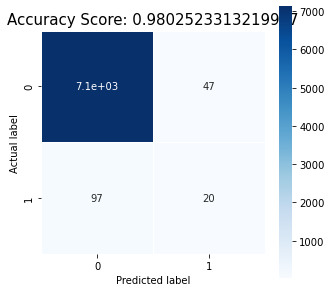

In [148]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

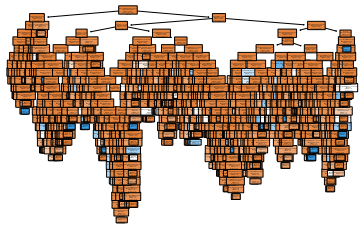

In [149]:
from sklearn.tree import plot_tree
# Visualising the graph without the use of 

dec_tree = plot_tree(decision_tree=dtree, feature_names = new_data.columns, 
                     class_names =['0','1'] , filled = True , precision = 10, rounded = True)


In [152]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9824465167306637


In [153]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=8)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9839550191991223
